# Start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
from keras import metrics, optimizers, regularizers, backend as K
from keras.layers import Input, Dense, concatenate, Dropout
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.utils import plot_model
K.clear_session()
import seaborn as sns

Using TensorFlow backend.


In [19]:
Q1_X = pd.read_csv('data/Q1_X_Clipped.csv' )
Q2_Y = pd.read_csv('data/Q2_Y_Clipped.csv' )
Q2_X = pd.read_csv('data/Q2_X_Clipped.csv' )
Q3_Y = pd.read_csv('data/Q3_Y_Clipped.csv' )
Q3_X = pd.read_csv('data/Q3_X_Clipped.csv' )
Q4_Y = pd.read_csv('data/Q4_Y_Clipped.csv' )

In [3]:
Q1_Item_2000 = pd.read_csv('data/Q1_Item_2000.csv' )
Q2_Item_2000 = pd.read_csv('data/Q2_Item_2000.csv' )
Q3_Item_2000 = pd.read_csv('data/Q3_Item_2000.csv' )

In [4]:
Q1_Item_5000 = pd.read_csv('data/Q1_Item_5000.csv' )
Q2_Item_5000 = pd.read_csv('data/Q2_Item_5000.csv' )
Q3_Item_5000 = pd.read_csv('data/Q3_Item_5000.csv' )

In [12]:
Q3_Item_2000.shape

(75393, 2368)

In [ ]:
Q1_Item_8000 = pd.read_csv('data/Q1_Item_8000.csv' )
Q2_Item_8000 = pd.read_csv('data/Q2_Item_8000.csv' )
Q3_Item_8000 = pd.read_csv('data/Q3_Item_8000.csv' )

# M1 kernel_regularizer  bias_regularizer L1

In [65]:
display(M1_MSE_DF, M1_MAE_DF)

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,258.291957,121.724147,94.815013,82.228768,148.225816
Valid,323.503037,165.712761,126.381240,117.824946,195.630228
Test,265.854551,147.807950,125.201727,124.193962,177.201645


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.067333,7.436793,5.883692,5.397167,5.611167
Valid,12.839763,8.175696,6.794998,6.137860,6.670334
Test,12.173799,8.032838,6.946041,6.328676,6.443390


In [113]:
# 紀錄Performance的DataFrame
M1_MSE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])
M1_MAE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

In [116]:
# 紀錄Performance的DataFrame
M1_Acc_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

## Null : 數據都為0

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
concatenate_31 (Concatenate)    (None, 2370)         0           Input_Features[0][0]             
                                                                 Input_Items[0][0]                
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 1)            2371        concatenate_31[0][0]             
Total para

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,261.043493,0,0,0,0
Valid,328.425140,0,0,0,0
Test,264.483834,0,0,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.104900,0,0,0,0
Valid,11.697753,0,0,0,0
Test,10.914197,0,0,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0,0,0,0
Valid,0.683910,0,0,0,0
Test,0.678883,0,0,0,0


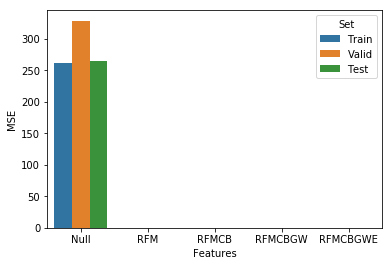

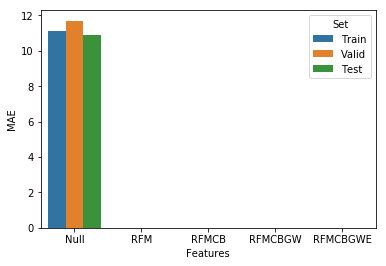

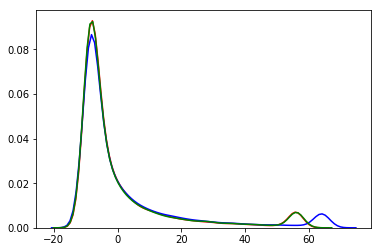

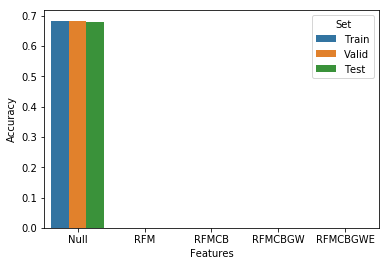

In [117]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
Merged1 = concatenate([A1, A2])
Dense1 = Dense(1,activation='relu',name='Dense1',
               kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l1(0.01) )
y = Dense1(Merged1)


model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
data_A1 = np.random.rand(observation*3).reshape( observation, 3 )
data_A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
data_y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ data_A1, data_A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                           epochs=15,
                           batch_size=64,
                           shuffle=True,
                           validation_data=([data_A1, data_A2], Q3_Y.loc[:,"F_CLipped"].values),
                           callbacks=[TensorBoard(log_dir='./tmp/r')])

# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Test data performance
testPerformance = model.evaluate([data_A1, data_A2], y = Q4_Y.loc[:,"F_CLipped"].values,
                                 batch_size=None, verbose=1, sample_weight=None, steps=None)

M1_MSE_DF.loc["Train","Null"]=modelcallbacks.history['loss'][-1]
M1_MSE_DF.loc["Valid","Null"]=modelcallbacks.history['val_loss'][-1]
M1_MSE_DF.loc["Test","Null"]=testPerformance[0]

M1_MAE_DF.loc["Train","Null"]=modelcallbacks.history['mean_absolute_error'][-1]
M1_MAE_DF.loc["Valid","Null"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M1_MAE_DF.loc["Test","Null"]=testPerformance[1]
display(M1_MSE_DF, M1_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M1_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M1_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "Null" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [data_A1, data_A2])
y_predict01 =np.where(y_predict >=1 , 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'r', hist=False)

### Valid
y_predict = model.predict(x = [data_A1, data_A2])
y_predict01 =np.where(y_predict >=1 , 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Test
y_predict = model.predict(x = [data_A1, data_A2])
y_predict01 =np.where(y_predict >=1 , 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M1_Acc_DF)
plt.figure()
stacked = M1_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFM

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
concatenate_32 (Concatenate)    (None, 2370)         0           Input_Features[0][0]             
                                                                 Input_Items[0][0]                
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 1)            2371        concatenate_32[0][0]             
Total para

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,261.043493,123.281559,0,0,0
Valid,328.425140,169.327116,0,0,0
Test,264.483834,149.540573,0,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.104900,7.430185,0,0,0
Valid,11.697753,7.894395,0,0,0
Test,10.914197,7.707122,0,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.688088,0,0,0
Valid,0.683910,0.686324,0,0,0
Test,0.678883,0.681323,0,0,0


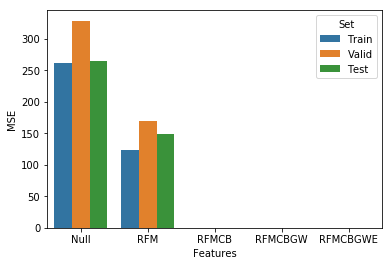

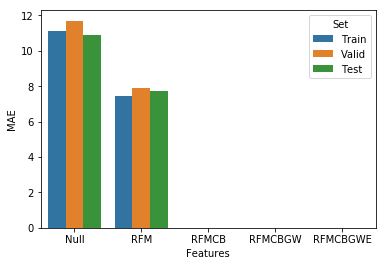

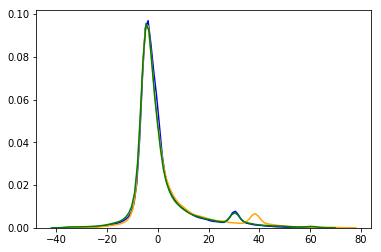

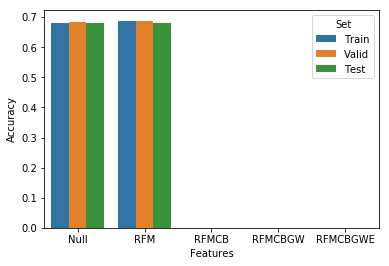

In [118]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
Merged1 = concatenate([A1, A2])
Dense1 = Dense(1,activation='relu',name='Dense1',
               kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l1(0.01))
y = Dense1(Merged1)

model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ Q1_X.loc[:,["R","F","M"]].values, A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M"]].values, A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M"]].values, A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

M1_MSE_DF.loc["Train","RFM"]=modelcallbacks.history['loss'][-1]
M1_MSE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_loss'][-1]
M1_MSE_DF.loc["Test","RFM"]=testPerformance[0]

M1_MAE_DF.loc["Train","RFM"]=modelcallbacks.history['mean_absolute_error'][-1]
M1_MAE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M1_MAE_DF.loc["Test","RFM"]=testPerformance[1]
display(M1_MSE_DF, M1_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M1_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M1_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFM" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M"]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M"]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M"]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M1_Acc_DF)
plt.figure()
stacked = M1_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFMCB : +Clumpiness+Breadth(商品種類）

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 8)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
concatenate_33 (Concatenate)    (None, 2375)         0           Input_Features[0][0]             
                                                                 Input_Items[0][0]                
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 1)            2376        concatenate_33[0][0]             
Total para

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,261.043493,123.281559,97.898684,0,0
Valid,328.425140,169.327116,130.663318,0,0
Test,264.483834,149.540573,124.893118,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.104900,7.430185,5.988157,0,0
Valid,11.697753,7.894395,6.502307,0,0
Test,10.914197,7.707122,6.558543,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.688088,0.706776,0,0
Valid,0.683910,0.686324,0.700078,0,0
Test,0.678883,0.681323,0.691351,0,0


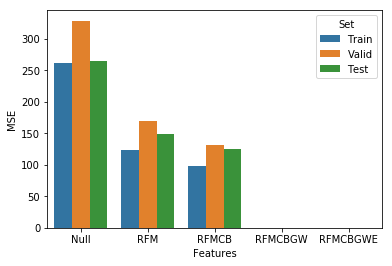

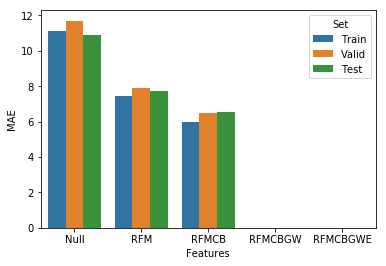

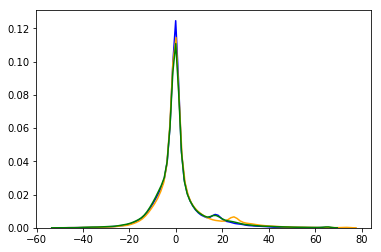

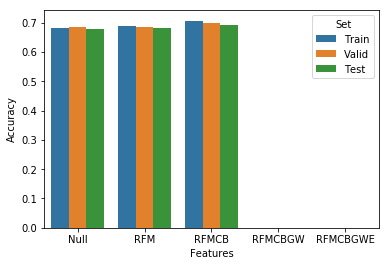

In [119]:
A1 = Input(shape = (8,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
Merged1 = concatenate([A1, A2])
Dense1 = Dense(1,activation='relu',name='Dense1',
               kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l1(0.01))
y = Dense1(Merged1)


model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
          y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
                                 Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
               y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

M1_MSE_DF.loc["Train","RFMCB"]=modelcallbacks.history['loss'][-1]
M1_MSE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_loss'][-1]
M1_MSE_DF.loc["Test","RFMCB"]=testPerformance[0]

M1_MAE_DF.loc["Train","RFMCB"]=modelcallbacks.history['mean_absolute_error'][-1]
M1_MAE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M1_MAE_DF.loc["Test","RFMCB"]=testPerformance[1]
display(M1_MSE_DF, M1_MAE_DF)


## MSE MAE barplot
plt.figure()
stacked = M1_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M1_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCB" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M1_Acc_DF)
plt.figure()
stacked = M1_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFMCBGW : +age/gender+count of weekday

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
concatenate_34 (Concatenate)    (None, 2384)         0           Input_Features[0][0]             
                                                                 Input_Items[0][0]                
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 1)            2385        concatenate_34[0][0]             
Total para

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,261.043493,123.281559,97.898684,84.331139,0
Valid,328.425140,169.327116,130.663318,124.035358,0
Test,264.483834,149.540573,124.893118,127.730515,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.104900,7.430185,5.988157,5.417046,0
Valid,11.697753,7.894395,6.502307,6.021214,0
Test,10.914197,7.707122,6.558543,6.149579,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.688088,0.706776,0.713382,0
Valid,0.683910,0.686324,0.700078,0.705450,0
Test,0.678883,0.681323,0.691351,0.689865,0


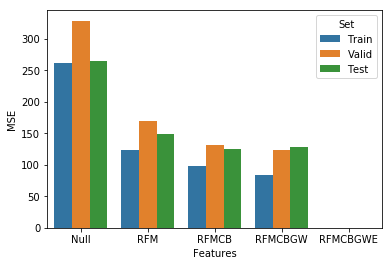

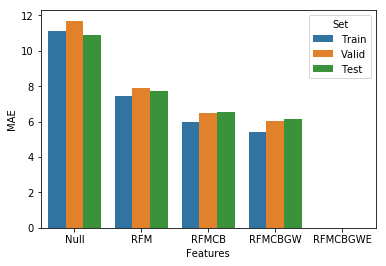

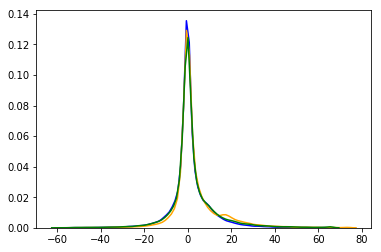

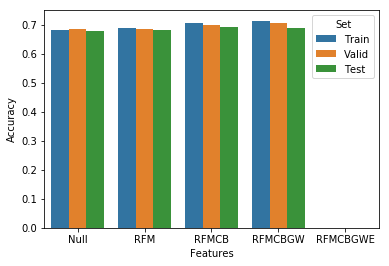

In [120]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
Merged1 = concatenate([A1, A2])
Dense1 = Dense(1,activation='relu',name='Dense1',
               kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l1(0.01))
y = Dense1(Merged1)

model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15+5,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                                  A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

M1_MSE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['loss'][-1]
M1_MSE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_loss'][-1]
M1_MSE_DF.loc["Test","RFMCBGW"]=testPerformance[0]

M1_MAE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['mean_absolute_error'][-1]
M1_MAE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M1_MAE_DF.loc["Test","RFMCBGW"]=testPerformance[1]
display(M1_MSE_DF, M1_MAE_DF)


## MSE MAE barplot
plt.figure()
stacked = M1_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M1_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGW" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                                  A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M1_Acc_DF)
plt.figure()
stacked = M1_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
concatenate_40 (Concatenate)    (None, 2384)         0           Input_Features[0][0]             
                                                                 Input_Items[0][0]                
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 1)            2385        concatenate_40[0][0]             
Total para

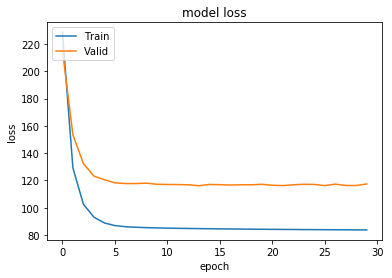

75393/75393 [==============================] - 5s 68us/step


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,261.043493,123.281559,97.898684,84.331139,83.692758
Valid,328.425140,169.327116,130.663318,124.035358,117.385915
Test,264.483834,149.540573,124.893118,127.730515,122.972510


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.104900,7.430185,5.988157,5.417046,5.449214
Valid,11.697753,7.894395,6.502307,6.021214,6.093380
Test,10.914197,7.707122,6.558543,6.149579,6.288555


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.688088,0.706776,0.713382,0.700967
Valid,0.683910,0.686324,0.700078,0.705450,0.690555
Test,0.678883,0.681323,0.691351,0.689865,0.690369


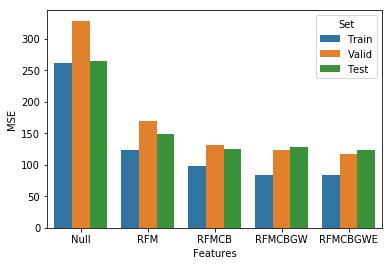

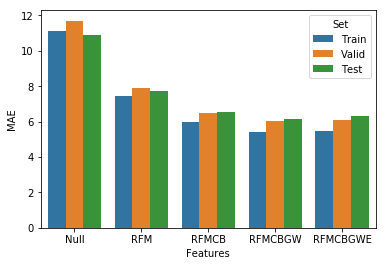

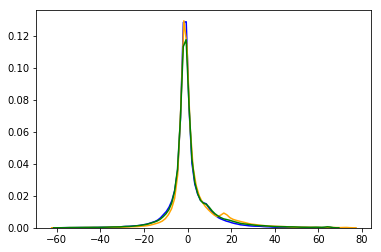

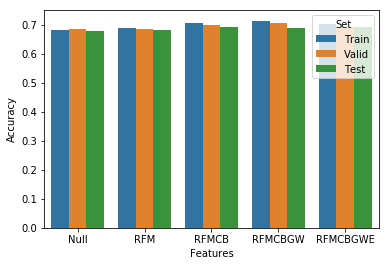

In [127]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
Merged1 = concatenate([A1, A2])
Dense1 = Dense(1,activation='relu',name='Dense1',
               kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l1(0.01))
y = Dense1(Merged1)


model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15+15,
                batch_size=32,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])


# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
M1_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M1_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M1_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M1_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M1_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M1_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M1_MSE_DF, M1_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M1_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M1_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGWE" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=1, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q2_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=1, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q3_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=1, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M1_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M1_Acc_DF)
plt.figure()
stacked = M1_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## plot_model

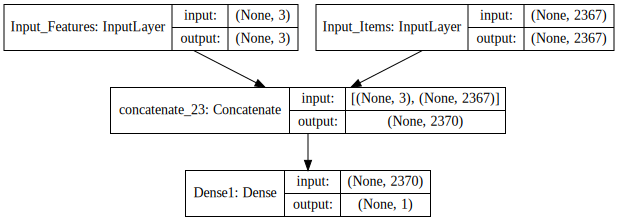

In [93]:
from keras.utils.vis_utils import plot_model 
import os
os.environ["path"] += os.pathsep +'C:/Users/e3621/AppData/Local/conda/conda/envs/tensorflow_yuta/Library/bin/graphviz/'
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes =True ).create(prog='dot', format='svg'))

In [87]:
display(M1_MSE_DF, M1_MAE_DF)

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,260.846773,123.498242,97.835292,84.899286,84.566662
Valid,325.358776,165.242193,128.103734,123.680736,117.278578
Test,265.661199,150.194274,125.464184,127.070168,122.130284


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.077300,7.442773,5.985880,5.439893,5.477655
Valid,12.496863,8.702970,7.035081,6.027156,6.130856
Test,11.797689,8.631400,7.143860,6.140203,6.306739


# M2 Dropout(0.4)

In [122]:
display(M2_MSE_DF, M2_MAE_DF)

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE,RRFMCB
Train,283.082710,168.239740,155.479545,152.806695,148.951992,NaN
Valid,340.292981,160.418704,140.367551,146.105095,146.336153,NaN
Test,271.128222,142.669813,0.000000,134.016584,126.915212,132.943862


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,10.809820,7.198667,6.840001,6.878456,6.755439
Valid,11.206955,7.165389,6.365621,6.791818,6.842097
Test,10.338260,6.985371,6.455093,6.713878,6.538879


In [15]:
# 紀錄Performance的DataFrame
M2_MSE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])
M2_MAE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

In [16]:
# 紀錄Performance的DataFrame
M2_Acc_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

## Null : 數據都為0

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_70

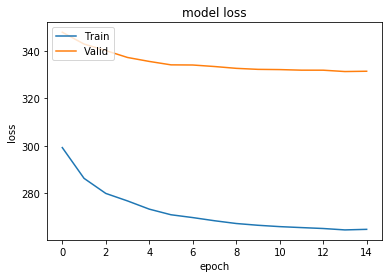

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.681894,0.681894,0.681894,0.681894
Valid,0.683910,0.683910,0.683910,0.683910,0.683910
Test,0.678883,0.678883,0.678883,0.678883,0.678883


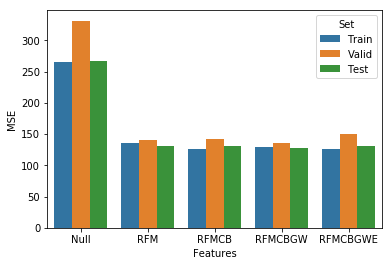

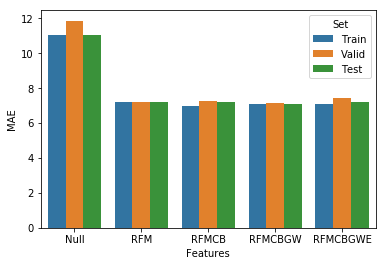

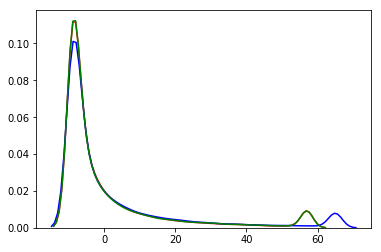

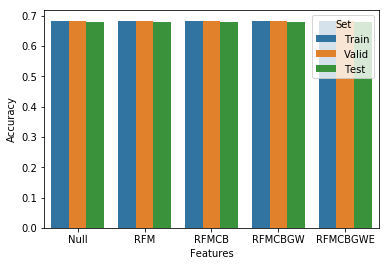

In [97]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.4)(B1)
B2 = D2(A2)
B2 = Dropout(0.5)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.4)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
data_A1 = np.random.rand(observation*3).reshape( observation, 3 )
data_A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
data_y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ data_A1, data_A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                           epochs=15,
                           batch_size=64,
                           shuffle=True,
                           validation_data=([data_A1, data_A2], Q3_Y.loc[:,"F_CLipped"].values),
                           callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([data_A1, data_A2], y = Q4_Y.loc[:,"F_CLipped"].values,
                                 batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","Null"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","Null"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","Null"]=testPerformance[0]

M2_MAE_DF.loc["Train","Null"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","Null"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","Null"]=testPerformance[1]
(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "Null" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [data_A1, data_A2])
y_predict01 =np.where(y_predict >=1 , 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'r', hist=False)

### Valid
y_predict = model.predict(x = [data_A1, data_A2])
y_predict01 =np.where(y_predict >=1 , 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Test
y_predict = model.predict(x = [data_A1, data_A2])
y_predict01 =np.where(y_predict >=1 , 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M2_Acc_DF)
plt.figure()
stacked = M2_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFM 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_46

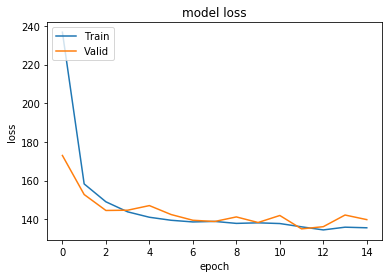

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,265.269101,135.627748,0,0,147.019500
Valid,331.567060,139.848246,0,0,156.402628
Test,266.284583,131.609385,0,0,134.767771


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.039184,7.237922,0,0,6.772385
Valid,11.844550,7.181116,0,0,6.968570
Test,11.050169,7.181061,0,0,6.661194


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.681894,0,0,0.681894
Valid,0.683910,0.683910,0,0,0.683910
Test,0.678883,0.678883,0,0,0.678883


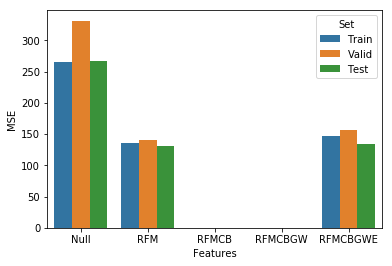

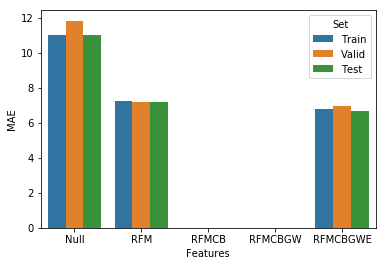

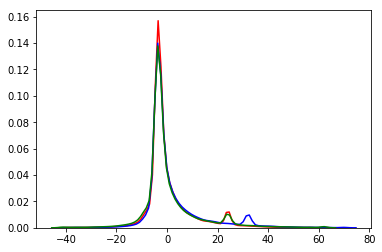

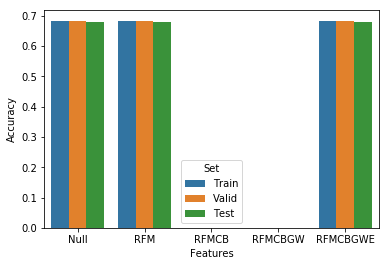

In [82]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.4)(B1)
B2 = D2(A2)
B2 = Dropout(0.5)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.4)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ Q1_X.loc[:,["R","F","M"]].values, A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M"]].values, A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M"]].values, A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFM"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFM"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFM"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFM"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFM" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M"]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M"]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M"]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M2_Acc_DF)
plt.figure()
stacked = M2_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFMCB : +Clumpiness+Breadth(商品種類）

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,265.269101,135.627748,125.393710,0,147.019500
Valid,331.567060,139.848246,141.672299,0,156.402628
Test,266.284583,131.609385,130.978098,0,134.767771


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.039184,7.237922,6.955380,0,6.772385
Valid,11.844550,7.181116,7.241766,0,6.968570
Test,11.050169,7.181061,7.235857,0,6.661194


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.681894,0.681894,0,0.681894
Valid,0.683910,0.683910,0.683910,0,0.683910
Test,0.678883,0.678883,0.678883,0,0.678883


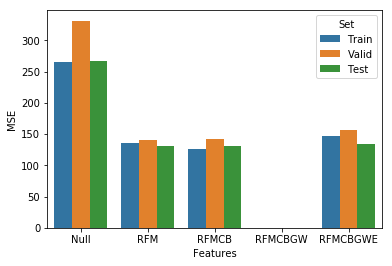

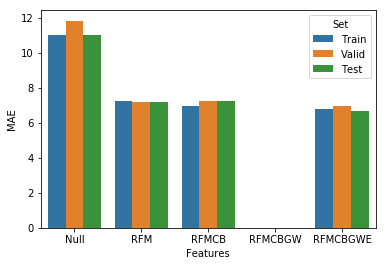

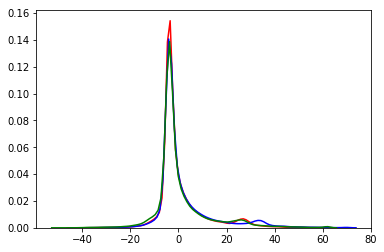

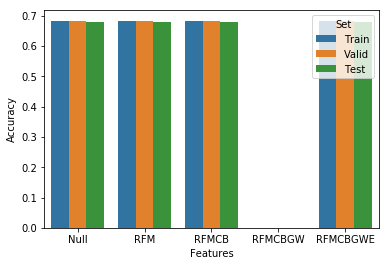

In [85]:
A1 = Input(shape = (8,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.4)(B1)
B2 = D2(A2)
B2 = Dropout(0.5)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.4)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
          y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=6,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
                                 Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
               y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCB"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCB"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCB"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCB"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCB" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M2_Acc_DF)
plt.figure()
stacked = M2_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFMCBGW : +age/gender+count of weekday

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_61

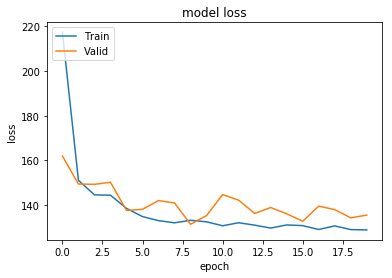

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,265.269101,135.627748,125.393710,128.910041,128.996411
Valid,331.567060,139.848246,141.672299,135.527579,143.591008
Test,266.284583,131.609385,130.978098,127.039254,126.262078


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.039184,7.237922,6.955380,7.110174,6.925278
Valid,11.844550,7.181116,7.241766,7.143194,6.654386
Test,11.050169,7.181061,7.235857,7.098267,6.495635


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0.681894,0.681894,0.681894,0.681894,0.318106
Valid,0.683910,0.683910,0.683910,0.683910,0.316090
Test,0.678883,0.678883,0.678883,0.678883,0.321117


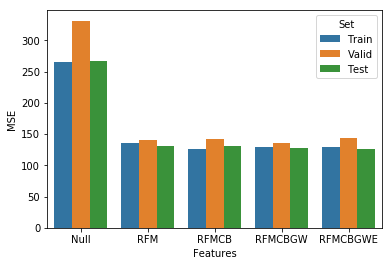

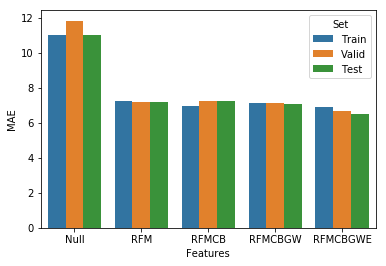

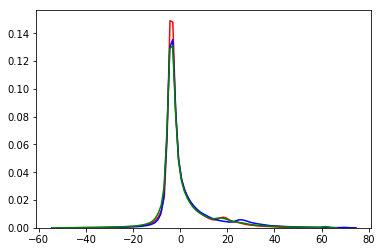

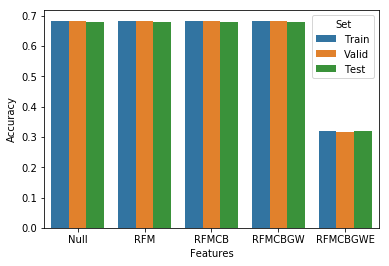

In [89]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.4)(B1)
B2 = D2(A2)
B2 = Dropout(0.5)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.4)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth",
                                            'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                                  A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGW"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGW"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)


## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGW" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                                  A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                A2])
y_predict01 =np.where(y_predict > 0, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M2_Acc_DF)
plt.figure()
stacked = M2_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)


## RFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_16

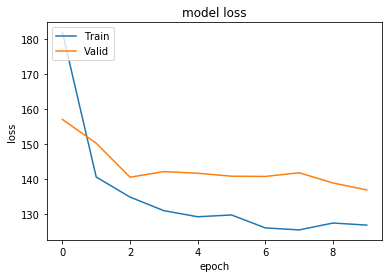

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,126.915115
Valid,0,0,0,0,136.945183
Test,0,0,0,0,125.012909


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,7.012757
Valid,0,0,0,0,7.120378
Test,0,0,0,0,7.013479


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,0.681894
Valid,0,0,0,0,0.683910
Test,0,0,0,0,0.678883


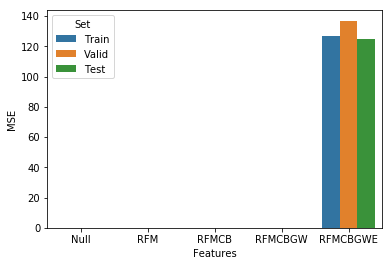

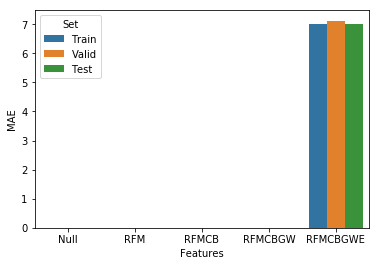

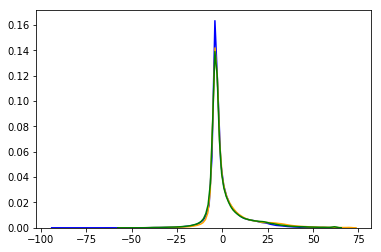

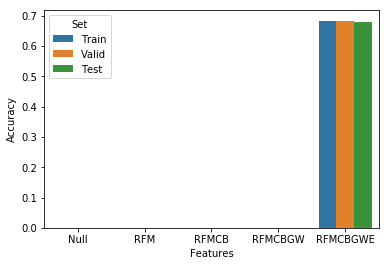

In [20]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.4)(B1)
B2 = D2(A2)
B2 = Dropout(0.5)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.4)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

#Performance
## summarize history for loss
plt.figure()
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGWE" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q2_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q3_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M2_Acc_DF)
plt.figure()
stacked = M2_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)



## RFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_22

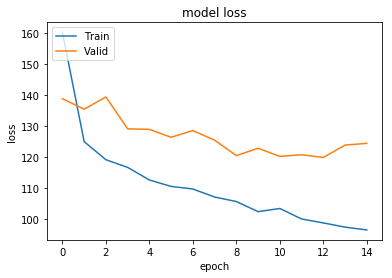

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,96.627119
Valid,0,0,0,0,124.461320
Test,0,0,0,0,119.561864


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,5.803926
Valid,0,0,0,0,6.064994
Test,0,0,0,0,6.164369


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,0.732827
Valid,0,0,0,0,0.746701
Test,0,0,0,0,0.691032


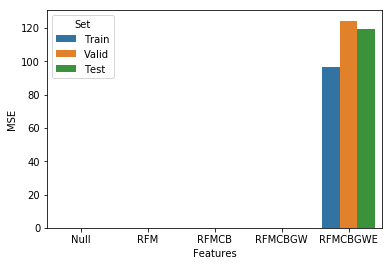

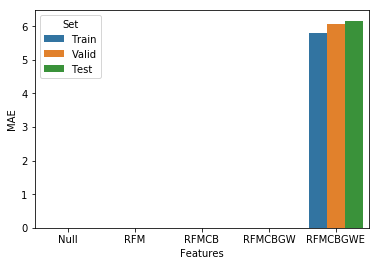

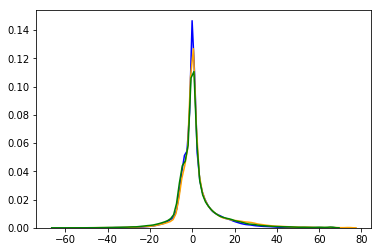

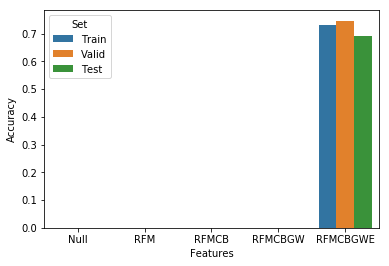

In [22]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367 #2000
#Item_TotalFeatures = 5278 #5000
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')#,kernel_regularizer=regularizers.l1(0.1),bias_regularizer=regularizers.l1(0.1))
B1 = D1(A1)
B1 = Dropout(0.2)(B1)
B2 = D2(A2)
B2 = Dropout(0.2)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.2)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=32,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

#Performance
## summarize history for loss
plt.figure()
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGWE" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q2_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q3_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M2_Acc_DF)
plt.figure()
stacked = M2_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)



## RFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_28

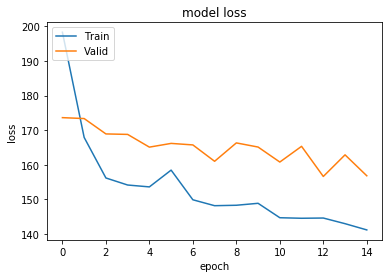

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,141.199080
Valid,0,0,0,0,156.842561
Test,0,0,0,0,132.821142


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,7.544802
Valid,0,0,0,0,7.672703
Test,0,0,0,0,7.294391


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,0.681894
Valid,0,0,0,0,0.683910
Test,0,0,0,0,0.678883


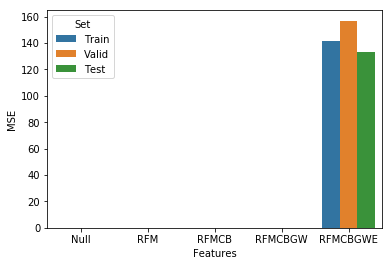

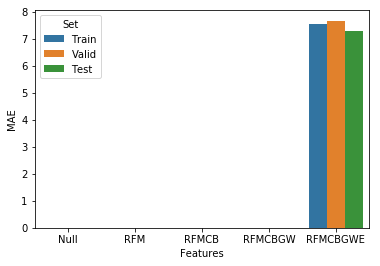

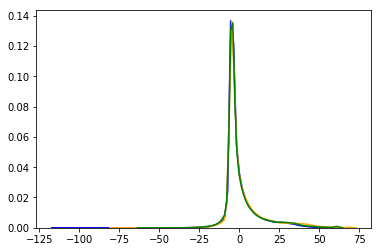

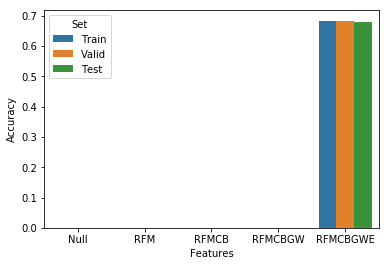

In [24]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367 #2000
#Item_TotalFeatures = 5278 #5000
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')#,kernel_regularizer=regularizers.l1(0.1),bias_regularizer=regularizers.l1(0.1))
B1 = D1(A1)
B1 = Dropout(0.5)(B1)
B2 = D2(A2)
B2 = Dropout(0.5)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.5)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=32,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

#Performance
## summarize history for loss
plt.figure()
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGWE" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q2_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q3_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M2_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M2_Acc_DF)
plt.figure()
stacked = M2_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)



## plot_model

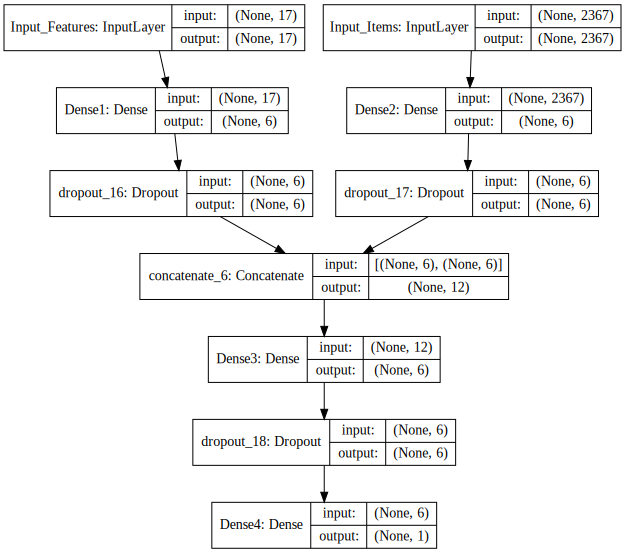

In [16]:
from keras.utils.vis_utils import plot_model 
import os
os.environ["path"] += os.pathsep +'C:/Users/e3621/AppData/Local/conda/conda/envs/tensorflow_yuta/Library/bin/graphviz/'
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes =True ).create(prog='dot', format='svg'))

# M3

In [132]:
# 紀錄Performance的DataFrame
M3_MSE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])
M3_MAE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

In [8]:
# 紀錄Performance的DataFrame
M2_MSE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])
M2_MAE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

In [133]:
# 紀錄Performance的DataFrame
M3_Acc_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

## M3xRFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 1000)         2368000     Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_140 (Dropout)           (None, 1000)         0           dense_32[0][0]                   
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 500)          500500      dropout_140[0][0]                
__________________________________________________________________________________________________
dropout_14

75393/75393 [==============================] - 64s 844us/step - loss: 90.9539 - mean_absolute_error: 5.8878 - val_loss: 151.3185 - val_mean_absolute_error: 7.6211
Epoch 66/200
75393/75393 [==============================] - 64s 844us/step - loss: 91.7009 - mean_absolute_error: 5.8751 - val_loss: 139.2011 - val_mean_absolute_error: 7.3733
Epoch 67/200
75393/75393 [==============================] - 64s 847us/step - loss: 90.9128 - mean_absolute_error: 5.8659 - val_loss: 158.5130 - val_mean_absolute_error: 7.7198
Epoch 68/200
75393/75393 [==============================] - 64s 846us/step - loss: 90.5921 - mean_absolute_error: 5.8644 - val_loss: 149.0125 - val_mean_absolute_error: 7.5324
Epoch 69/200
75393/75393 [==============================] - 64s 846us/step - loss: 90.4201 - mean_absolute_error: 5.8512 - val_loss: 146.8344 - val_mean_absolute_error: 7.5248
Epoch 70/200
75393/75393 [==============================] - 64s 844us/step - loss: 91.2557 - mean_absolute_error: 5.8936 - val_loss: 

75393/75393 [==============================] - 65s 857us/step - loss: 89.3180 - mean_absolute_error: 5.7068 - val_loss: 157.2075 - val_mean_absolute_error: 7.6950
Epoch 158/200
75393/75393 [==============================] - 65s 864us/step - loss: 87.4621 - mean_absolute_error: 5.7016 - val_loss: 158.2304 - val_mean_absolute_error: 7.7317
Epoch 159/200
75393/75393 [==============================] - 65s 859us/step - loss: 86.8261 - mean_absolute_error: 5.6517 - val_loss: 147.6178 - val_mean_absolute_error: 7.5374
Epoch 160/200
75393/75393 [==============================] - 65s 863us/step - loss: 87.1840 - mean_absolute_error: 5.6528 - val_loss: 156.5299 - val_mean_absolute_error: 7.6943
Epoch 161/200
75393/75393 [==============================] - 65s 860us/step - loss: 87.8418 - mean_absolute_error: 5.6785 - val_loss: 162.9867 - val_mean_absolute_error: 7.7934 - loss:
Epoch 162/200
75393/75393 [==============================] - 65s 861us/step - loss: 86.3678 - mean_absolute_error: 5.6487

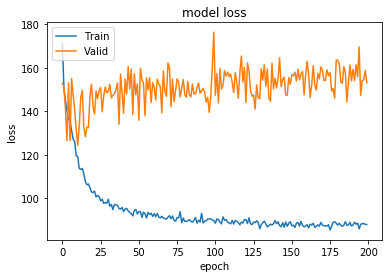

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,87.913993
Valid,0,0,0,0,153.058748
Test,0,0,0,0,129.076902


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,5.668726
Valid,0,0,0,0,7.607930
Test,0,0,0,0,7.130471


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,0,0,0,0,0.681894
Valid,0,0,0,0,0.683910
Test,0,0,0,0,0.678883


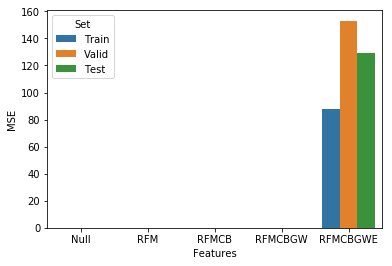

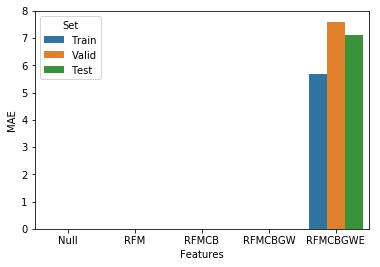

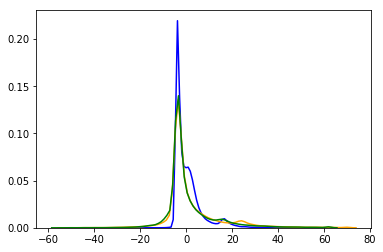

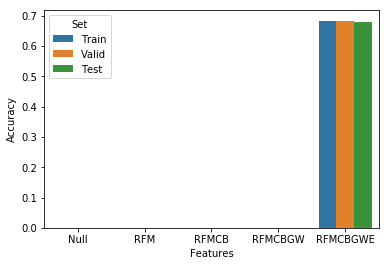

In [138]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
B1 = Dense(2000,activation='relu')(A1)
B1 = Dropout(0.4)(B1)
B2 = Dense(1000,activation='relu')(A2)
B2 = Dropout(0.4)(B2)
C = Dense(500,activation='relu')(B2)
C = Dropout(0.4)(C)
D = Dense(250,activation='relu')(C)
D = Dropout(0.4)(D)
E = Dense(100,activation='relu')(D)
E = Dropout(0.4)(E)
F = Dense(50,activation='relu')(E)
F = Dropout(0.4)(F)
Merged1 = concatenate([F, B1])
M = Dense(30,activation='relu')(Merged1)
M = Dropout(0.4)(M)
N = Dense(15,activation='relu')(M)
N = Dropout(0.4)(N)
O = Dense(5,activation='relu')(N)
O = Dropout(0.4)(O)
y = Dense(1,activation='relu')(O)

model = Model(inputs=[A1, A2], outputs=[y])
#adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M3_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M3_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M3_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M3_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M3_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M3_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M3_MSE_DF,M3_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M3_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M3_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGWE" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M3_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q2_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M3_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q3_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M3_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M3_Acc_DF)
plt.figure()
stacked = M3_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)



## M3xRFMCBGWE : +item embedded  

In [ ]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
B1 = Dense(2000,activation='relu')(A1)
B1 = Dropout(0.4)(B1)
B2 = Dense(1000,activation='relu')(A2)
B2 = Dropout(0.4)(B2)
C = Dense(500,activation='relu')(B2)
C = Dropout(0.4)(C)
D = Dense(250,activation='relu')(C)
D = Dropout(0.4)(D)
E = Dense(100,activation='relu')(D)
E = Dropout(0.4)(E)
F = Dense(50,activation='relu')(E)
F = Dropout(0.4)(F)
Merged1 = concatenate([F, B1])
M = Dense(30,activation='relu')(Merged1)
M = Dropout(0.4)(M)
N = Dense(15,activation='relu')(M)
N = Dropout(0.4)(N)
O = Dense(5,activation='relu')(N)
O = Dropout(0.4)(O)
y = Dense(1,activation='relu')(O)

model = Model(inputs=[A1, A2], outputs=[y])
#adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=200,
                batch_size=32,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M3_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M3_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M3_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M3_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M3_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M3_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M3_MSE_DF,M3_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M3_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M3_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

M = "RFMCBGWE" #模型的名稱，對應DataFrame
### Train
y_predict = model.predict(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q2_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M3_Acc_DF.loc["Train",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
plt.figure()
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'b', hist=False)

### Valid
y_predict = model.predict(x = [Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q2_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q3_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M3_Acc_DF.loc["Valid",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'orange', hist=False)

### Test
y_predict = model.predict(x = [Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q3_Item_2000.iloc[:,1:].values])
y_predict01 =np.where(y_predict >=0.58, 1, 0)
y_true = Q4_Y.loc[:,"F_CLipped"].values
y_true01 =np.where( y_true> 0, 1, 0)
M3_Acc_DF.loc["Test",M] = accuracy_score(y_true= y_true01, y_pred =  y_predict01, normalize=True)
#### densityplt
sns.distplot(y_true.reshape(75393)- y_predict.round().reshape(75393), color = 'g', hist=False)

#### Acc barplot
display(M3_Acc_DF)
plt.figure()
stacked = M3_Acc_DF.stack().reset_index().rename(columns={0:'Accuracy',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.Accuracy, hue=stacked.Set)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 1000)         2368000     Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_149 (Dropout)           (None, 1000)         0           dense_42[0][0]                   
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 500)          500500      dropout_149[0][0]                
__________________________________________________________________________________________________
dropout_15

Epoch 66/200
75393/75393 [==============================] - 112s 1ms/step - loss: 88.5920 - mean_absolute_error: 5.7640 - val_loss: 146.6107 - val_mean_absolute_error: 7.5134
Epoch 67/200
75393/75393 [==============================] - 112s 1ms/step - loss: 85.6699 - mean_absolute_error: 5.6980 - val_loss: 196.9989 - val_mean_absolute_error: 8.3051
Epoch 68/200
75393/75393 [==============================] - 112s 1ms/step - loss: 86.3864 - mean_absolute_error: 5.7028 - val_loss: 146.4560 - val_mean_absolute_error: 7.4819
Epoch 69/200
75393/75393 [==============================] - 113s 1ms/step - loss: 86.1566 - mean_absolute_error: 5.6813 - val_loss: 145.2870 - val_mean_absolute_error: 7.5042
Epoch 70/200
75393/75393 [==============================] - 113s 1ms/step - loss: 86.5389 - mean_absolute_error: 5.7072 - val_loss: 155.9957 - val_mean_absolute_error: 7.6992
Epoch 71/200
75393/75393 [==============================] - 112s 1ms/step - loss: 86.2943 - mean_absolute_error: 5.7008 - val

Epoch 113/200
75393/75393 [==============================] - 113s 1ms/step - loss: 85.1383 - mean_absolute_error: 5.6125 - val_loss: 150.5406 - val_mean_absolute_error: 7.5560
Epoch 114/200
75393/75393 [==============================] - 113s 1ms/step - loss: 83.7098 - mean_absolute_error: 5.5705 - val_loss: 153.4697 - val_mean_absolute_error: 7.6207
Epoch 115/200
75393/75393 [==============================] - 113s 1ms/step - loss: 85.1885 - mean_absolute_error: 5.5946 - val_loss: 147.6739 - val_mean_absolute_error: 7.5112
Epoch 116/200
75393/75393 [==============================] - 113s 1ms/step - loss: 83.9966 - mean_absolute_error: 5.5650 - val_loss: 160.3736 - val_mean_absolute_error: 7.7552
Epoch 117/200
75393/75393 [==============================] - 112s 1ms/step - loss: 85.6239 - mean_absolute_error: 5.6170 - val_loss: 166.4279 - val_mean_absolute_error: 7.8484
Epoch 118/200
75393/75393 [==============================] - 112s 1ms/step - loss: 86.2461 - mean_absolute_error: 5.6339

## plot_model

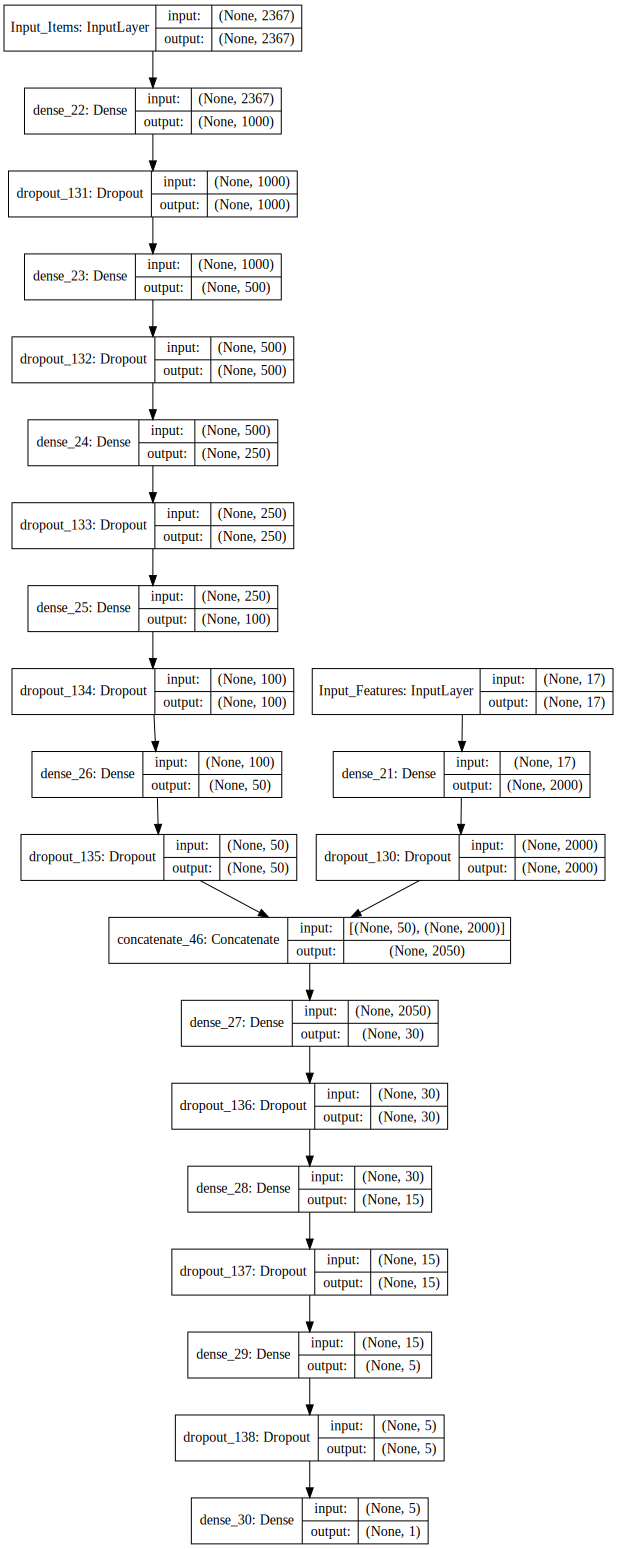

In [137]:
from keras.utils.vis_utils import plot_model 
import os
os.environ["path"] += os.pathsep +'C:/Users/e3621/AppData/Local/conda/conda/envs/tensorflow_yuta/Library/bin/graphviz/'
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes =True ).create(prog='dot', format='svg'))

# Others

# M2 Dropout(0.2)

In [122]:
display(M2_MSE_DF, M2_MAE_DF)

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE,RRFMCB
Train,283.082710,168.239740,155.479545,152.806695,148.951992,NaN
Valid,340.292981,160.418704,140.367551,146.105095,146.336153,NaN
Test,271.128222,142.669813,0.000000,134.016584,126.915212,132.943862


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,10.809820,7.198667,6.840001,6.878456,6.755439
Valid,11.206955,7.165389,6.365621,6.791818,6.842097
Test,10.338260,6.985371,6.455093,6.713878,6.538879


In [16]:
# 紀錄Performance的DataFrame
M2_MSE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])
M2_MAE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

## Null : 數據都為0

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_50

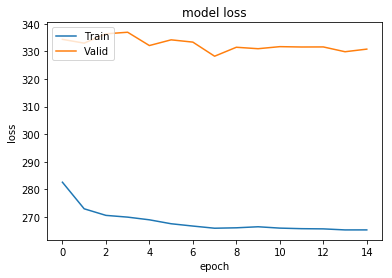

(             Null         RFM       RFMCB     RFMCBGW    RFMCBGWE
 Train  265.306163   91.796096   87.263572   84.157190   79.767054
 Valid  330.821541  122.405525  102.495540  121.227702  112.500466
 Test   266.099924  126.035793  122.102868  123.341300  117.226127,
             Null       RFM     RFMCB   RFMCBGW  RFMCBGWE
 Train  11.082941  5.766562  5.668880  5.502560  5.438829
 Valid  11.947379  6.526167  6.119855  6.373476  6.143857
 Test   11.163732  6.690040  6.663226  6.505852  6.397752)

In [33]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.2)(B1)
B2 = D2(A2)
B2 = Dropout(0.2)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.2)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
data_A1 = np.random.rand(observation*3).reshape( observation, 3 )
data_A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
data_y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ data_A1, data_A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                           epochs=15,
                           batch_size=64,
                           shuffle=True,
                           validation_data=([data_A1, data_A2], Q3_Y.loc[:,"F_CLipped"].values),
                           callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([data_A1, data_A2], y = Q4_Y.loc[:,"F_CLipped"].values,
                                 batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","Null"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","Null"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","Null"]=testPerformance[0]

M2_MAE_DF.loc["Train","Null"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","Null"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","Null"]=testPerformance[1]
(M2_MSE_DF,M2_MAE_DF)

## RFM 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_53

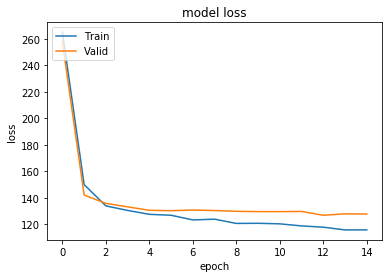

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,265.306163,115.754560,87.263572,84.157190,79.767054
Valid,330.821541,127.738361,102.495540,121.227702,112.500466
Test,266.099924,127.250918,122.102868,123.341300,117.226127


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.082941,6.436502,5.668880,5.502560,5.438829
Valid,11.947379,6.759323,6.119855,6.373476,6.143857
Test,11.163732,6.890625,6.663226,6.505852,6.397752


In [34]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.2)(B1)
B2 = D2(A2)
B2 = Dropout(0.2)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.2)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ Q1_X.loc[:,["R","F","M"]].values, A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M"]].values, A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M"]].values, A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFM"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFM"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFM"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFM"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCB : +Clumpiness+Breadth(商品種類）

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 8)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            54          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_56

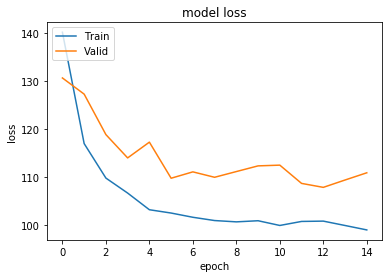

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,265.306163,115.754560,98.993496,84.157190,79.767054
Valid,330.821541,127.738361,110.919617,121.227702,112.500466
Test,266.099924,127.250918,120.460148,123.341300,117.226127


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.082941,6.436502,6.111378,5.502560,5.438829
Valid,11.947379,6.759323,6.430752,6.373476,6.143857
Test,11.163732,6.890625,6.794500,6.505852,6.397752


In [35]:
A1 = Input(shape = (8,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.2)(B1)
B2 = D2(A2)
B2 = Dropout(0.2)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.2)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
          y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=6,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
                                 Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
               y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCB"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCB"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCB"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCB"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCBGW : +age/gender+count of weekday

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_59

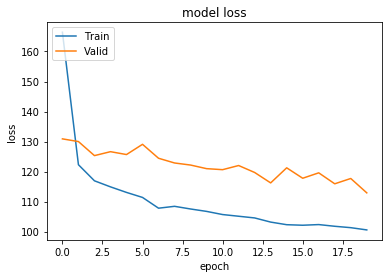

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,265.306163,115.754560,98.993496,100.566864,79.767054
Valid,330.821541,127.738361,110.919617,112.909478,112.500466
Test,266.099924,127.250918,120.460148,119.971454,117.226127


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.082941,6.436502,6.111378,6.075567,5.438829
Valid,11.947379,6.759323,6.430752,6.282801,6.143857
Test,11.163732,6.890625,6.794500,6.540777,6.397752


In [36]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.2)(B1)
B2 = D2(A2)
B2 = Dropout(0.2)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.2)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                                  A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGW"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGW"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_62

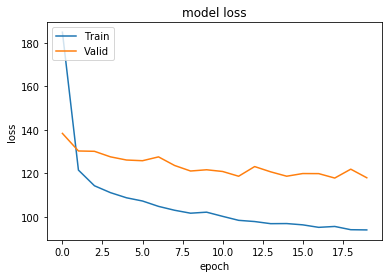

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,265.306163,115.754560,98.993496,100.566864,93.949803
Valid,330.821541,127.738361,110.919617,112.909478,117.939453
Test,266.099924,127.250918,120.460148,119.971454,114.304899


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,11.082941,6.436502,6.111378,6.075567,5.912072
Valid,11.947379,6.759323,6.430752,6.282801,6.426331
Test,11.163732,6.890625,6.794500,6.540777,6.477428


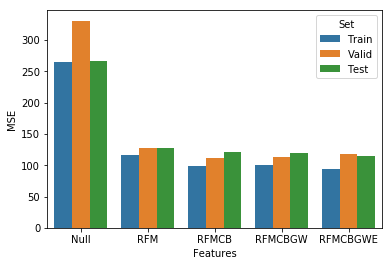

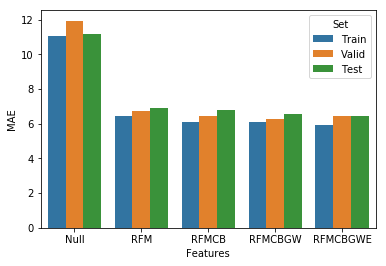

In [37]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.2)(B1)
B2 = D2(A2)
B2 = Dropout(0.2)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.2)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

# M2 Dropout(0.1)

In [25]:
# 紀錄Performance的DataFrame
M2_MSE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])
M2_MAE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

## Null : 數據都為0

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_31

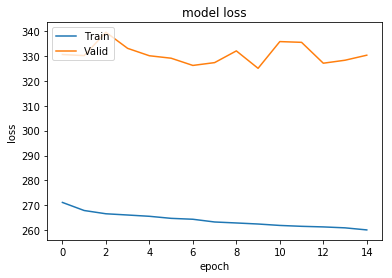

(             Null  RFM  RFMCB  RFMCBGW  RFMCBGWE
 Train  260.095056    0      0        0         0
 Valid  330.335330    0      0        0         0
 Test   264.328787    0      0        0         0,
             Null  RFM  RFMCB  RFMCBGW  RFMCBGWE
 Train  10.970626    0      0        0         0
 Valid  11.332687    0      0        0         0
 Test   10.501706    0      0        0         0)

In [26]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
data_A1 = np.random.rand(observation*3).reshape( observation, 3 )
data_A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
data_y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ data_A1, data_A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                           epochs=15,
                           batch_size=64,
                           shuffle=True,
                           validation_data=([data_A1, data_A2], Q3_Y.loc[:,"F_CLipped"].values),
                           callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([data_A1, data_A2], y = Q4_Y.loc[:,"F_CLipped"].values,
                                 batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","Null"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","Null"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","Null"]=testPerformance[0]

M2_MAE_DF.loc["Train","Null"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","Null"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","Null"]=testPerformance[1]
(M2_MSE_DF,M2_MAE_DF)

## RFM 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_34

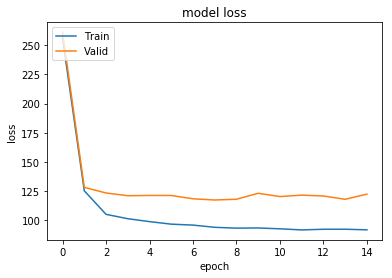

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,260.095056,91.796096,0,0,0
Valid,330.335330,122.405525,0,0,0
Test,264.328787,126.035793,0,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,10.970626,5.766562,0,0,0
Valid,11.332687,6.526167,0,0,0
Test,10.501706,6.690040,0,0,0


In [27]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ Q1_X.loc[:,["R","F","M"]].values, A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M"]].values, A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M"]].values, A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFM"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFM"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFM"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFM"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCB : +Clumpiness+Breadth(商品種類）

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 8)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            54          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_37

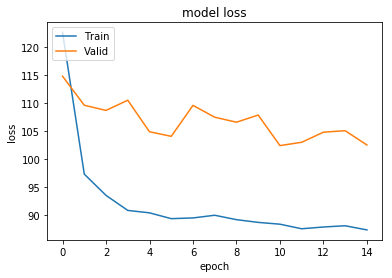

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,260.095056,91.796096,87.263572,0,0
Valid,330.335330,122.405525,102.495540,0,0
Test,264.328787,126.035793,122.102868,0,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,10.970626,5.766562,5.668880,0,0
Valid,11.332687,6.526167,6.119855,0,0
Test,10.501706,6.690040,6.663226,0,0


In [28]:
A1 = Input(shape = (8,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
          y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=15,
                batch_size=6,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
                                 Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
               y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCB"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCB"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCB"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCB"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCBGW : +age/gender+count of weekday

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_40

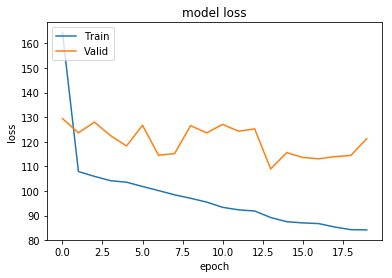

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,260.095056,91.796096,87.263572,84.157190,0
Valid,330.335330,122.405525,102.495540,121.227702,0
Test,264.328787,126.035793,122.102868,123.341300,0


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,10.970626,5.766562,5.668880,5.502560,0
Valid,11.332687,6.526167,6.119855,6.373476,0
Test,10.501706,6.690040,6.663226,6.505852,0


In [29]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               A2], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                                  A2], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                A2], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGW"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGW"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_47

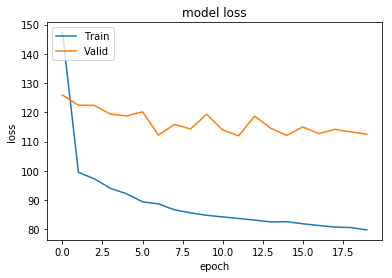

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,260.095056,91.796096,87.263572,84.157190,79.767054
Valid,330.335330,122.405525,102.495540,121.227702,112.500466
Test,264.328787,126.035793,122.102868,123.341300,117.226127


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,10.970626,5.766562,5.668880,5.502560,5.438829
Valid,11.332687,6.526167,6.119855,6.373476,6.143857
Test,10.501706,6.690040,6.663226,6.505852,6.397752


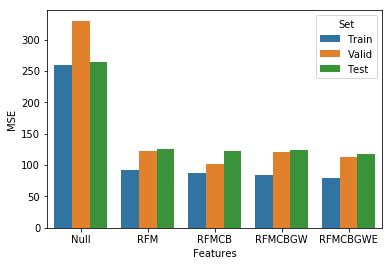

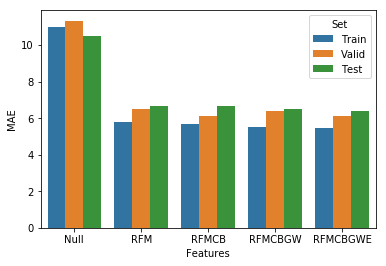

In [32]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F_CLipped"].values,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F_CLipped"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F_CLipped"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

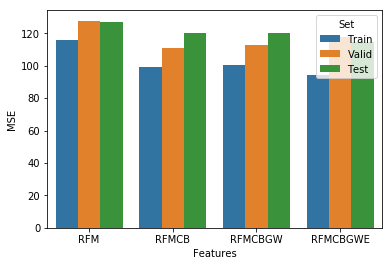

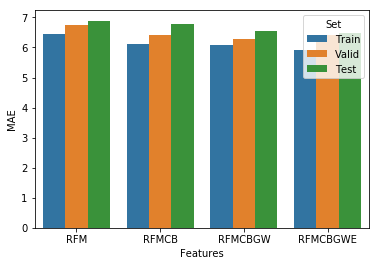

In [50]:

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.iloc[:,1:].stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.iloc[:,1:].stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

## plot_model

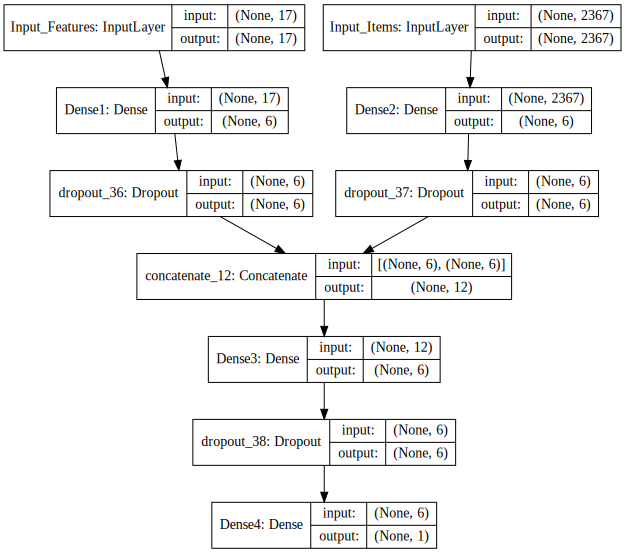

In [31]:
from keras.utils.vis_utils import plot_model 
import os
os.environ["path"] += os.pathsep +'C:/Users/e3621/AppData/Local/conda/conda/envs/tensorflow_yuta/Library/bin/graphviz/'
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes =True ).create(prog='dot', format='svg'))

# M2 Dropout(0.1) y=F

In [25]:
# 紀錄Performance的DataFrame
M2_MSE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])
M2_MAE_DF = pd.DataFrame(data={"Null":[0,0,0], "RFM":[0,0,0],  "RFMCB":[0,0,0], 
                               "RFMCBGW":[0,0,0],  "RFMCBGWE":[0,0,0]}, index =["Train","Valid","Test"])

## Null : 數據都為0

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_65

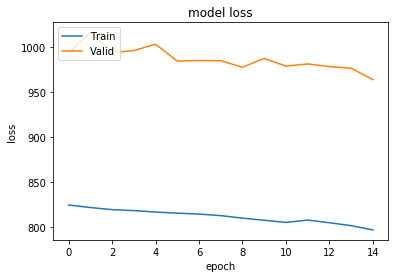

(             Null         RFM       RFMCB     RFMCBGW    RFMCBGWE
 Train  797.263827  115.754560   98.993496  100.566864   93.949803
 Valid  964.278678  127.738361  110.919617  112.909478  117.939453
 Test   821.360343  127.250918  120.460148  119.971454  114.304899,
             Null       RFM     RFMCB   RFMCBGW  RFMCBGWE
 Train  14.218897  6.436502  6.111378  6.075567  5.912072
 Valid  15.034376  6.759323  6.430752  6.282801  6.426331
 Test   14.307781  6.890625  6.794500  6.540777  6.477428)

In [51]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
data_A1 = np.random.rand(observation*3).reshape( observation, 3 )
data_A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
data_y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ data_A1, data_A2], y = Q2_Y.loc[:,"F"].values,
                           epochs=15,
                           batch_size=64,
                           shuffle=True,
                           validation_data=([data_A1, data_A2], Q3_Y.loc[:,"F"].values),
                           callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([data_A1, data_A2], y = Q4_Y.loc[:,"F"].values,
                                 batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","Null"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","Null"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","Null"]=testPerformance[0]

M2_MAE_DF.loc["Train","Null"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","Null"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","Null"]=testPerformance[1]
(M2_MSE_DF,M2_MAE_DF)

## RFM 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 3)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            24          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_71

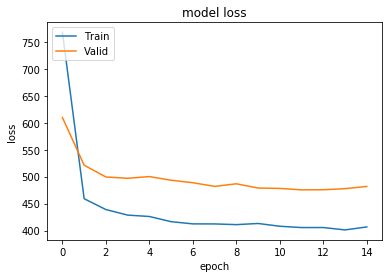

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,797.263827,406.617662,98.993496,100.566864,93.949803
Valid,964.278678,481.838889,110.919617,112.909478,117.939453
Test,821.360343,456.711314,120.460148,119.971454,114.304899


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,14.218897,8.439227,6.111378,6.075567,5.912072
Valid,15.034376,8.721068,6.430752,6.282801,6.426331
Test,14.307781,9.130341,6.794500,6.540777,6.477428


In [53]:
A1 = Input(shape = (3,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [ Q1_X.loc[:,["R","F","M"]].values, A2], y = Q2_Y.loc[:,"F"].values,
                epochs=15,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M"]].values, A2], Q3_Y.loc[:,"F"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M"]].values, A2], y = Q4_Y.loc[:,"F"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFM"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFM"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFM"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFM"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFM"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCB : +Clumpiness+Breadth(商品種類）

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 8)            0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            54          Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_74

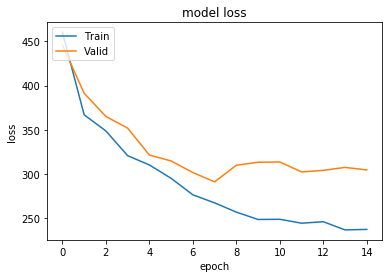

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,797.263827,406.617662,237.680383,100.566864,93.949803
Valid,964.278678,481.838889,304.817513,112.909478,117.939453
Test,821.360343,456.711314,352.946898,119.971454,114.304899


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,14.218897,8.439227,7.374120,6.075567,5.912072
Valid,15.034376,8.721068,7.554014,6.282801,6.426331
Test,14.307781,9.130341,8.285292,6.540777,6.477428


In [54]:
A1 = Input(shape = (8,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
          y = Q2_Y.loc[:,"F"].values,
                epochs=15,
                batch_size=6,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
                                 Q3_Y.loc[:,"F"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3' ]].values, A2],
               y = Q4_Y.loc[:,"F"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCB"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCB"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCB"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCB"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCB"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCBGW : +age/gender+count of weekday

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_83

75393/75393 [==============================] - 5s 61us/step - loss: 265.8772 - mean_absolute_error: 7.2293 - val_loss: 314.7414 - val_mean_absolute_error: 7.5663
Epoch 34/40
75393/75393 [==============================] - 5s 62us/step - loss: 241.5651 - mean_absolute_error: 7.2070 - val_loss: 310.3515 - val_mean_absolute_error: 7.4824
Epoch 35/40
75393/75393 [==============================] - 5s 66us/step - loss: 234.9024 - mean_absolute_error: 7.1560 - val_loss: 314.3336 - val_mean_absolute_error: 7.4475
Epoch 36/40
75393/75393 [==============================] - 5s 61us/step - loss: 240.5685 - mean_absolute_error: 7.2033 - val_loss: 310.7726 - val_mean_absolute_error: 7.4555
Epoch 37/40
75393/75393 [==============================] - 5s 62us/step - loss: 231.4664 - mean_absolute_error: 7.1170 - val_loss: 331.6441 - val_mean_absolute_error: 7.5741
Epoch 38/40
75393/75393 [==============================] - 5s 65us/step - loss: 233.3174 - mean_absolute_error: 7.1529 - val_loss: 311.3591 - 

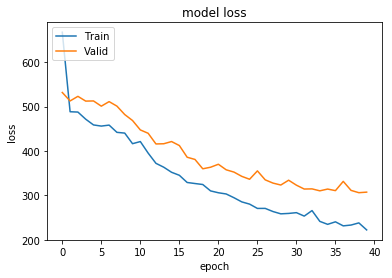

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,797.263827,406.617662,237.680383,222.346676,231.648873
Valid,964.278678,481.838889,304.817513,307.404621,357.541100
Test,821.360343,456.711314,352.946898,335.906529,308.765812


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,14.218897,8.439227,7.374120,7.071970,6.900998
Valid,15.034376,8.721068,7.554014,7.521062,7.634971
Test,14.307781,9.130341,8.285292,8.098035,7.755839


In [57]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = "Adam",
              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
y = np.random.rand(observation*1).reshape( observation, 1 )

modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               A2], y = Q2_Y.loc[:,"F"].values,
                epochs=40,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                                  A2], Q3_Y.loc[:,"F"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values, 
                A2], y = Q4_Y.loc[:,"F"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGW"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGW"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGW"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGW"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## M2xRFMCBGWE : +item embedded  

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     (None, 17)           0                                            
__________________________________________________________________________________________________
Input_Items (InputLayer)        (None, 2367)         0                                            
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 6)            108         Input_Features[0][0]             
__________________________________________________________________________________________________
Dense2 (Dense)                  (None, 6)            14208       Input_Items[0][0]                
__________________________________________________________________________________________________
dropout_86

Epoch 33/40
75393/75393 [==============================] - 10s 130us/step - loss: 203.1325 - mean_absolute_error: 6.8906 - val_loss: 345.3767 - val_mean_absolute_error: 7.8545
Epoch 34/40
75393/75393 [==============================] - 10s 134us/step - loss: 202.7891 - mean_absolute_error: 6.8562 - val_loss: 339.9682 - val_mean_absolute_error: 7.8024
Epoch 35/40
75393/75393 [==============================] - 10s 133us/step - loss: 202.5419 - mean_absolute_error: 6.8741 - val_loss: 343.5419 - val_mean_absolute_error: 7.8056
Epoch 36/40
75393/75393 [==============================] - 10s 131us/step - loss: 222.2862 - mean_absolute_error: 6.9250 - val_loss: 345.6857 - val_mean_absolute_error: 7.8258
Epoch 37/40
75393/75393 [==============================] - 10s 135us/step - loss: 197.1776 - mean_absolute_error: 6.8836 - val_loss: 343.3498 - val_mean_absolute_error: 7.8405
Epoch 38/40
75393/75393 [==============================] - 10s 133us/step - loss: 199.9846 - mean_absolute_error: 6.8567

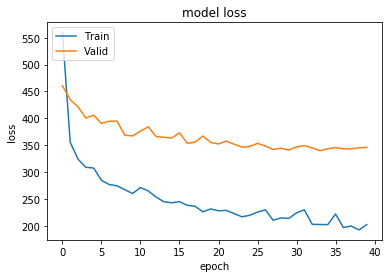

,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,797.263827,406.617662,237.680383,222.346676,202.559354
Valid,964.278678,481.838889,304.817513,307.404621,346.061588
Test,821.360343,456.711314,352.946898,335.906529,300.050187


,Null,RFM,RFMCB,RFMCBGW,RFMCBGWE
Train,14.218897,8.439227,7.374120,7.071970,6.863541
Valid,15.034376,8.721068,7.554014,7.521062,7.868814
Test,14.307781,9.130341,8.285292,8.098035,8.083511


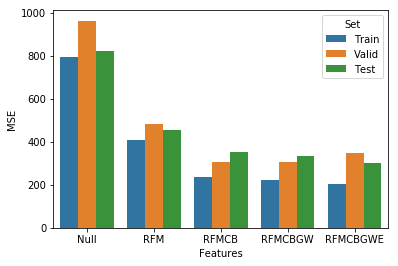

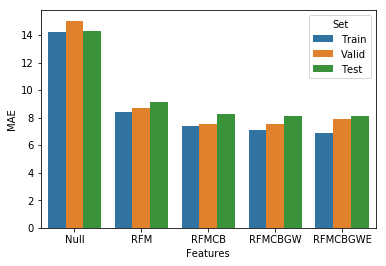

In [58]:
A1 = Input(shape = (17,),name='Input_Features')
Item_TotalFeatures = 2367
A2 = Input(shape = (Item_TotalFeatures,),name='Input_Items')
D1 = Dense(6,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B1 = Dropout(0.1)(B1)
B2 = D2(A2)
B2 = Dropout(0.1)(B2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = Dropout(0.1)(D3(Merged1))
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer =  "Adam",
              metrics=['mean_absolute_error'])
model.summary()
modelcallbacks = model.fit(x = [Q1_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
               Q1_Item_2000.iloc[:,1:].values], y = Q2_Y.loc[:,"F"].values,
                epochs=40,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                                  Q2_Item_2000.iloc[:,1:].values], Q3_Y.loc[:,"F"].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
testPerformance = model.evaluate([Q3_X.loc[:,["R","F","M","Breadth", 'L2', 'Entropy', 'LogUtility', 'C3', 'age', 'gender_0F1M',
                           'CountSun', 'CountMon', 'CountTue', 'CountWed', 'CountThu', 'CountFri', 'CountSat' ]].values,
                Q3_Item_2000.iloc[:,1:].values], y = Q4_Y.loc[:,"F"].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)
# summarize history for loss
plt.plot(modelcallbacks.history['loss'])
plt.plot(modelcallbacks.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

M2_MSE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['loss'][-1]
M2_MSE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_loss'][-1]
M2_MSE_DF.loc["Test","RFMCBGWE"]=testPerformance[0]

M2_MAE_DF.loc["Train","RFMCBGWE"]=modelcallbacks.history['mean_absolute_error'][-1]
M2_MAE_DF.loc["Valid","RFMCBGWE"]=modelcallbacks.history['val_mean_absolute_error'][-1]
M2_MAE_DF.loc["Test","RFMCBGWE"]=testPerformance[1]
display(M2_MSE_DF,M2_MAE_DF)

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

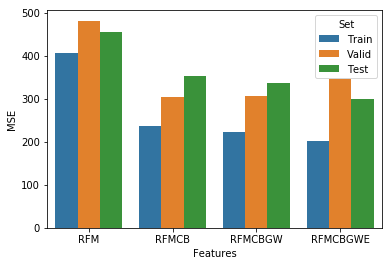

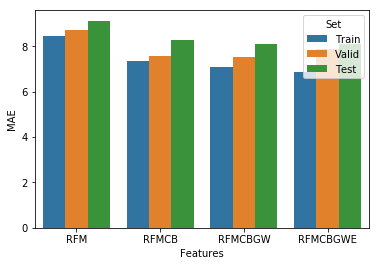

In [59]:

## MSE MAE barplot
plt.figure()
stacked = M2_MSE_DF.iloc[:,1:].stack().reset_index().rename(columns={0:'MSE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MSE, hue=stacked.Set)

plt.figure()
stacked = M2_MAE_DF.iloc[:,1:].stack().reset_index().rename(columns={0:'MAE',"level_0": "Set", "level_1": "Features",})
sns.barplot(x=stacked.Features, y=stacked.MAE, hue=stacked.Set)

## plot_model

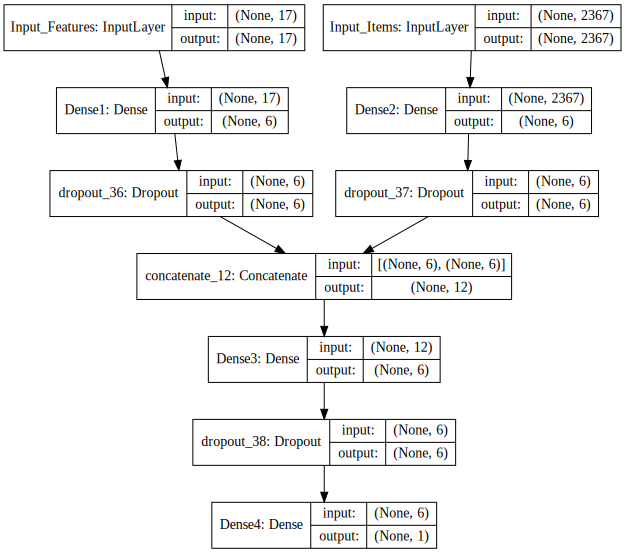

In [31]:
from keras.utils.vis_utils import plot_model 
import os
os.environ["path"] += os.pathsep +'C:/Users/e3621/AppData/Local/conda/conda/envs/tensorflow_yuta/Library/bin/graphviz/'
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes =True ).create(prog='dot', format='svg'))

# Others

##  Clipping feature values ( F ) at 200

In [ ]:
Q2_Y["F_clipped"] =Q2_Y["F"].clip(0, 200)
Q3_Y["F_clipped"] =Q3_Y["F"].clip(0, 200)
Q4_Y["F_clipped"] =Q4_Y["F"].clip(0, 200)

In [ ]:
A1 = Input(shape = (3,),name='Input_Features')
A2 = Input(shape = (2367,),name='Input_Items')
D1 = Dense(5,activation='relu',name='Dense1')
D2 = Dense(6,activation='relu',name='Dense2')
B1 = D1(A1)
B2 = D2(A2)
Merged1 = concatenate([B1, B2])
D3 = Dense(6,activation='relu',name='Dense3')
C = D3(Merged1)
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(C)

model = Model(inputs=[A1, A2], outputs=[y])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_absolute_percentage_error', optimizer = "sgd",
              metrics=['mean_squared_error'])
model.summary()

observation = Q1_X.shape[0]
A1 = np.random.rand(observation*12).reshape( observation, 12 )
A2 = np.random.rand(observation*5000).reshape( observation, 5000 )
y = np.random.rand(observation*1).reshape( observation, 1 )

model.fit(x = [Q1_X.loc[:,["R","F","M"]],Q1_Item_2000.iloc[:,1:]], y = Q2_Y["F_clipped"],
                epochs=5,
                batch_size=64,
                shuffle=True,
                validation_data=([Q2_X.loc[:,["R","F","M"]],Q2_Item_2000.iloc[:,1:]], Q3_Y["F_clipped"]),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
model.evaluate([Q3_X.loc[:,["R","F","M"]],Q3_Item_2000.iloc[:,1:]], y = Q4_Y["F_clipped"],
               batch_size=None, verbose=1, sample_weight=None, steps=None)

## 資料集分布探索

In [ ]:
display(
    np.mean(Q2_Y.iloc[:,3]),
    np.mean(Q3_Y.iloc[:,3]),
    np.mean(Q4_Y.iloc[:,3]),   
    Q2_Y.iloc[:,3].head(10),
    Q3_Y.iloc[:,3].head(10),
    Q4_Y.iloc[:,3].head(10),
    Q2_Y.iloc[:,3].tail(10),
    Q3_Y.iloc[:,3].tail(10),
    Q4_Y.iloc[:,3].tail(10),
    Q2_Y.iloc[:,3].hist(),
    Q3_Y.iloc[:,3].tail(10),
    Q4_Y.iloc[:,3].tail(10)
)

In [ ]:
Q2_Y["F_clipped"].hist(bins=300)
Q2_Y["F_clipped"].describe()

Q2_Y.loc[ :,"F"].hist(bins=300)
Q2_Y.loc[ :,"F"] .describe()

In [ ]:
Q3_Y.loc[ Q3_Y["F_clipped"]>0,"F_clipped"].hist(bins=300)
Q3_Y.loc[ Q3_Y["F_clipped"]>0,"F_clipped"] .describe()
Q3_Y.loc[ :,"F"].hist(bins=300)
Q3_Y.loc[ :,"F"] .describe()

In [ ]:
Q4_Y["F_clipped"].hist(bins=300)
Q4_Y["F_clipped"].describe()
Q4_Y.loc[ :,"F"].hist(bins=300)
Q4_Y.loc[ :,"F"] .describe()

## 測試程式碼

### RFM

In [ ]:
Q1_X.loc[:,["R","F","M"]].values

In [ ]:
A1 = Input(shape = (3,),name='Input_Features')
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(A1)

model = Model(inputs=A1, outputs=y)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = adam,)
#              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
data_A1 = np.random.rand(observation*12).reshape( observation, 12 )
data_A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
data_y = np.random.rand(observation*1).reshape( observation, 1 )

model.fit(x = Q1_X.loc[:,["R","F","M"]].values, y = Q2_Y.iloc[:,3].values,
                epochs=15+5,
                batch_size=64,
                shuffle=True,
                validation_data=(Q1_X.loc[:,["R","F","M"]].values, Q3_Y.iloc[:,3].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
model.evaluate(x = Q1_X.loc[:,["R","F","M"]].values, y = Q4_Y.iloc[:,3].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)

### F

In [ ]:
A1 = Input(shape = (1,),name='Input_Features')
D4 = Dense(1,activation='relu',name='Dense4')
y = D4(A1)

model = Model(inputs=A1, outputs=y)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'mean_squared_error', optimizer = adam,)
#              metrics=['mean_absolute_error'])
model.summary()

observation = Q1_X.shape[0]
data_A1 = np.random.rand(observation*12).reshape( observation, 12 )
data_A2 = np.random.rand(observation*Item_TotalFeatures).reshape( observation, Item_TotalFeatures )
data_y = np.random.rand(observation*1).reshape( observation, 1 )

model.fit(x = Q1_X.iloc[:,5].values, y = Q2_Y.iloc[:,3].values,
                epochs=15+5,
                batch_size=64,
                shuffle=True,
                validation_data=(Q2_X.iloc[:,5].values, Q3_Y.iloc[:,3].values),
                callbacks=[TensorBoard(log_dir='./tmp/r')])

### /Users/yuta_mac/Desktop/AllFam08
### callbacks=[TensorBoard(log_dir='./tmp/r1')])
### tensorboard --logdir='/Users/yuta_mac/Desktop/AllFam08/tmp/r1'
### tensorboard --logdir=C:\Users\e3621\桌面\AllFam08\tmp\r1
### localhost:6006 

# Test data performance
model.evaluate(x = Q3_X.iloc[:,5].values, y = Q4_Y.iloc[:,3].values,
               batch_size=None, verbose=1, sample_weight=None, steps=None)